In [ ]:
!pip install gdown

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import copy
import gdown

In [9]:
from google.colab import drive
drive.mount('/content/drive')

gdown.download('https://drive.google.com/uc?id=18HCzpRnUzMYwrWJ4k6qnkgqhlLY735NO', 'data_hackaton_train.data', quiet=False)
gdown.download('https://drive.google.com/uc?id=1hPNALVA0QQOuAAGx-YSsPXb3BwbJb8j7', 'data_hackaton_test.data', quiet=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileURLRetrievalError: Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=18HCzpRnUzMYwrWJ4k6qnkgqhlLY735NO

but Gdown can't. Please check connections and permissions.

In [ ]:
train_df = pd.read_pickle('data_hackaton_train.data')
train_df.shape

FileNotFoundError: [Errno 2] No such file or directory: 'data_hackaton_train.data'

In [ ]:
train_df

,start,moves,steps,solution,score,accepted_pair
269056,"[TAAGT---, AAGTT---, AAGCT---, CCCGT---, AATAT...","[B0+;3077, C0+;528, E0+;1132, F4+;4288, D4+;14...","[(2, 0), (3, 0), (5, 0), (6, 4), (4, 4), (1, 4)]","[TAAG-T, -AAGTT, -AAGCT, CCCG-T, -AATAT, AAAC-T]",18.0,"[(T, G), (-, T), (A, C), (A, C), (A, C), (G, T..."
499174,"[GCAATT--, GGAACT--, GCAATT--, CCAATC--, CCAGC...","[A3+;10686, B3+;465, D3+;707, C3+;665, F3+;156...","[(1, 3), (2, 3), (4, 3), (3, 3), (6, 3), (5, 5...","[GCA-A-TT, G-GAACT, GCA-A-TT, CC-A-ATC, CCAGC-...",26.0,"[(-, C), (C, T), (C, T), (C, G), (A, C), (A, C..."
85143,"[TTGA----, TGAG----, AAG-----, GTGA----, TGG--...","[C1+;13838, A0+;8192, D2+;11987]","[(3, 1), (1, 0), (4, 2)]","[-TTGA, TGAG, A-AG, GT-GA, TGG, TCGA]",15.0,"[(G, T), (T, G), (A, T), (G, T), (-, T), (-, G..."
260335,"[TACCTC------, GAACGC------, GGCAC-------, AGG...","[D0+;9860, F0+;4104, F1+;1535, G0+;3771, I0+;4...","[(4, 0), (6, 0), (6, 1), (7, 0), (9, 0)]","[TACCTC, GAACGC, GGCAC, -AGGTCC, AAAAGC, --GGT...",49.0,"[(-, C), (A, C), (A, G), (G, A), (-, T), (-, G..."
338124,"[GGAA---, ATAAA--, ATAAA--, GCAC---, TGAA---, ...","[B2+;12844, D2+;1042, C2+;1533, E2+;1442]","[(2, 2), (4, 2), (3, 2), (5, 2)]","[GGAA, AT-AAA, AT-AAA, GC-AC, TG-AA, AATA]",11.0,"[(C, T), (C, T), (T, G), (-, T), (A, C), (A, C..."
...,...,...,...,...,...,...
259178,"[TGGC---, TCCC---, CTCC---, CGTA---, GTGT---, ...","[C0+;4072, E0+;1769, C1+;2435, B1+;1018]","[(3, 0), (5, 0), (3, 1), (2, 1)]","[TGGC, T-CCC, --CTCC, CGTA, -GTGT, GGTAG]",12.0,"[(A, T), (A, G), (G, A), (T, G), (T, C), (T, G..."
365838,"[TCATAGCCT---, TCATAGGGC---, TCAATTTTT---, TCA...","[C2+;16917, D2+;1552, F5+;17050, B5+;11445, A8...","[(3, 2), (4, 2), (6, 5), (2, 5), (1, 8), (5, 8...","[TCATAGCC-T, TCATA-GGGC, TC-AATTTTT, TC-AAGATT...",43.0,"[(G, A), (-, C), (T, G), (C, T), (A, C), (-, T..."
131932,"[CAGT---, TAGT---, GCTT---, AAGT---, GAGT---, ...","[A0+;11501, B0+;1750]","[(1, 0), (2, 0)]","[-CAGT, -TAGT, GCTT, AAGT, GAGT, GGGC]",15.0,"[(G, A), (T, G), (G, A), (A, G), (G, T), (-, C..."
146867,"[TTTG---, GAAG---, GAGG---, GATG---, GTT----, ...","[A0+;4807, B1+;3803, C1+;4005, C2+;3369, D2+;2...","[(1, 0), (2, 1), (3, 1), (3, 2), (4, 2), (4, 2...","[-TTTG, GA-AG, G--AGG, GA-TG, GTT, A--A-CC]",19.0,"[(-, G), (-, T), (G, T), (A, T), (T, G), (G, T..."


In [ ]:
DICT_SYMBOLS = {
    'A': 1,
    'T': 2,
    'C': 3,
    'G': 4}

In [ ]:
class Puzzle:
    def __init__(self, data):
        self.start = list(data["start"])
        self.moves = copy.deepcopy(data.get("moves"))
        self.steps = copy.deepcopy(data.get("steps"))
        self.solution = list(data["solution"])
        self.score = data["score"]
        self.accepted_pair = data["accepted_pair"]

        self.padded_start = self.build_puzzle_to_end(self.start)
        self.padded_solution = self.build_puzzle_to_end(self.solution)

    def build_puzzle_to_end(self, puzzle):
        """Pad each row with '-' to match the longest row for visualization."""
        max_len = max(len(row) for row in puzzle)
        return [row.ljust(max_len, '-') for row in puzzle]

    def plot_puzzle(self, puzzle, title):
        puzzle = self.build_puzzle_to_end(puzzle)
        num_puzzle = np.array([[DICT_SYMBOLS.get(char, 0) for char in row] for row in puzzle])
        rot_num_puzzle = np.rot90(num_puzzle, 1)
        puzzle_array = np.array([list(row) for row in puzzle])
        rot_labels = np.rot90(puzzle_array, 1)

        plt.figure(figsize=(8, 6))
        sns.heatmap(rot_num_puzzle, annot=rot_labels, fmt="", cmap="Pastel1_r", cbar=False)
        plt.title(title)
        plt.axis("off")
        plt.show()

    def gearbox_score(self, puzzle, bonus=1.15):
        consensus = self.accepted_pair
        score = 0
        for col_ind in range(len(puzzle[0])):
            col_bonus = True
            col_tot = 0
            column_chars = [row[col_ind] for row in puzzle]
            for char in column_chars:
                if char == "-":
                    col_bonus = False
                    continue
                if char in consensus[col_ind]:
                    col_tot += 1
                else:
                    col_bonus = False
            column_score = col_tot * bonus if col_bonus else col_tot
            score += column_score
        print(f"Total Gearbox Score: {score}")
        return score

    def _apply_step_to_puzzle(self, puzzle, step):
        """Apply a single step to the puzzle."""
        new_puzzle = puzzle.copy()
        row_index = step[0] - 1
        col_index = step[1]
        if row_index < 0 or row_index >= len(new_puzzle):
            return new_puzzle
        row_str = new_puzzle[row_index]
        if col_index < 0 or col_index > len(row_str):
            return new_puzzle
        new_row = row_str[:col_index] + '-' + row_str[col_index:]
        new_row = new_row[:len(row_str)]
        new_puzzle[row_index] = new_row
        return new_puzzle

    def apply_all_steps(self):
        """Apply all steps on a copy of the puzzle and plot states."""
        current_puzzle = list(self.start)
        updated_puzzles = []
        scores = []

        for step in self.steps:
            current_puzzle = self._apply_step_to_puzzle(current_puzzle, step)
            padded_current = self.build_puzzle_to_end(current_puzzle)
            score = self.gearbox_score(padded_current)
            updated_puzzles.append(padded_current)
            scores.append(score)

        n_steps = len(updated_puzzles)
        fig, axes = plt.subplots(1, n_steps, figsize=(4 * n_steps, 6))
        if n_steps == 1:
            axes = [axes]
        for idx, (puzzle_state, score) in enumerate(zip(updated_puzzles, scores)):
            num_puzzle = np.array([[DICT_SYMBOLS.get(char, 0) for char in row] for row in puzzle_state])
            rot_num_puzzle = np.rot90(num_puzzle, 1)
            puzzle_array = np.array([list(row) for row in puzzle_state])
            rot_labels = np.rot90(puzzle_array, 1)
            ax = axes[idx]
            sns.heatmap(rot_num_puzzle, annot=rot_labels, fmt="", cmap="Pastel1_r", cbar=False, ax=ax)
            ax.set_title(f"Step {idx+1}\nScore: {score}")
            ax.axis("off")
        plt.tight_layout()
        plt.show()
        return current_puzzle

In [ ]:
# Create puzzle
puzzle_data = {
    'start': train_df.iloc[-1]['start'],
    'moves': train_df.iloc[-1].get('moves'),
    'steps': train_df.iloc[-1].get('steps'),
    'solution': train_df.iloc[-1]['solution'],
    'score': train_df.iloc[-1]['score'],
    'accepted_pair': train_df.iloc[-1]['accepted_pair']
}

puzzle = Puzzle(puzzle_data)

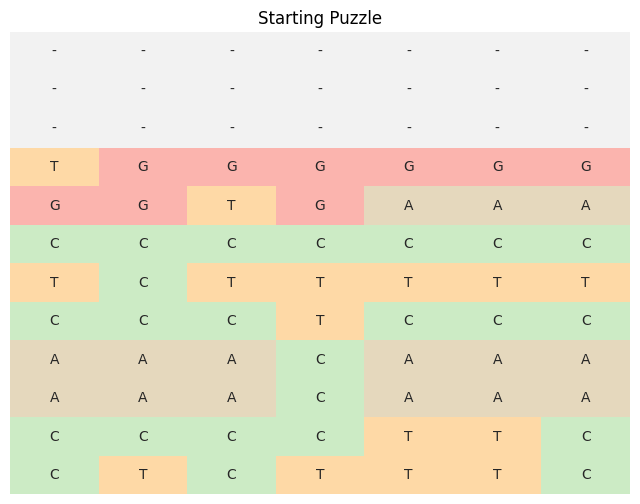

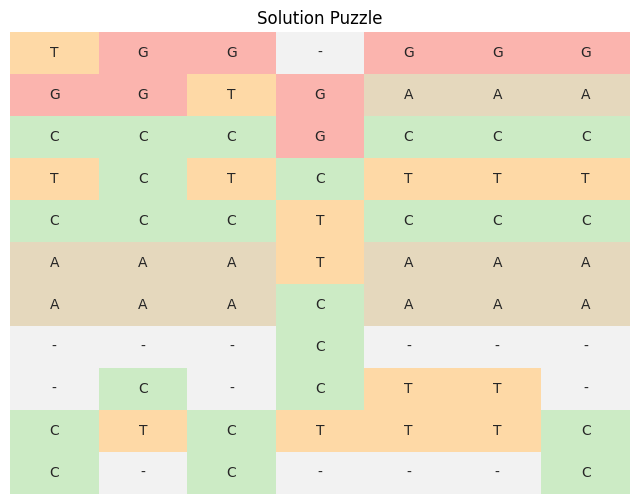

In [ ]:
puzzle.plot_puzzle(puzzle.start, "Starting Puzzle")
puzzle.plot_puzzle(puzzle.solution, "Solution Puzzle")


Total Gearbox Score: 33.099999999999994
Total Gearbox Score: 37.15
Total Gearbox Score: 41.15
Total Gearbox Score: 45.14999999999999
Total Gearbox Score: 47.14999999999999
Total Gearbox Score: 50.14999999999999
Total Gearbox Score: 55.249999999999986
Total Gearbox Score: 56.249999999999986
Total Gearbox Score: 58.249999999999986
Total Gearbox Score: 59.249999999999986
Total Gearbox Score: 59.19999999999999
Total Gearbox Score: 60.19999999999999
Total Gearbox Score: 61.19999999999999


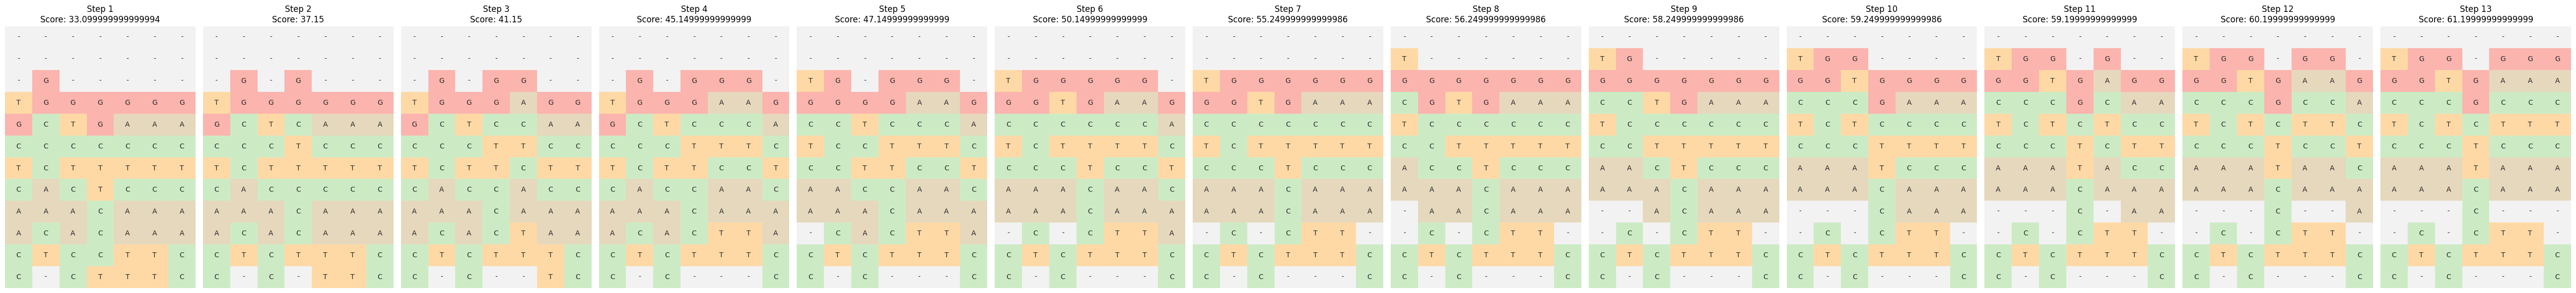

In [ ]:
updated_puzzle = puzzle.apply_all_steps()

In [ ]:
puzzle.steps

[(2, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (1, 2),
 (3, 2),
 (7, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (6, 3),
 (7, 3)]

In [ ]:
import copy
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt
import seaborn as sns
import time

char2int = {'A': 0, 'T': 1, 'G': 2, 'C': 3, '-': 4}
DICT_SYMBOLS = {'A': 1, 'T': 2, 'G': 3, 'C': 4, '-': 0}

# =============================================================================
# RL Environment with Reward Shaping and Action Space Restriction
# =============================================================================
class RLMSAPuzzleEnv_AC:
    def __init__(self, starting_sequences, accepted_pair, max_moves):
        self.start = copy.deepcopy(starting_sequences)
        self.accepted_pair = accepted_pair
        self.max_moves = max_moves
        self.reset()

    def reset(self):
        self.sequences = copy.deepcopy(self.start)
        self.moves_taken = []
        self.step_count = 0
        self.current_score = self.get_alignment_score()
        return self.get_state()

    def build_puzzle_to_end(self, puzzle):
        max_len = max(len(row) for row in puzzle)
        return [row.ljust(max_len, '-') for row in puzzle]

    def get_alignment_score(self):
        padded = self.build_puzzle_to_end(self.sequences)
        score = 0
        bonus = 1.15
        num_cols = len(padded[0])
        consensus = self.accepted_pair
        for j in range(num_cols):
            col = [row[j] for row in padded]
            col_bonus = True
            col_tot = 0
            for ch in col:
                if ch == '-':
                    col_bonus = False
                    continue
                if j < len(consensus) and ch in consensus[j]:
                    col_tot += 1
                else:
                    col_bonus = False
            column_score = col_tot * bonus if col_bonus else col_tot
            score += column_score
        return score

    def get_state(self):
        padded = self.build_puzzle_to_end(self.sequences)
        state = np.array([[char2int.get(ch, 4) for ch in row] for row in padded])
        return state

    def step(self, action):
        seq_idx, pos = action
        row = self.sequences[seq_idx]
        if pos >= len(row):
            pos = len(row) - 1
        new_row = row[:pos] + '-' + row[pos:]
        new_row = new_row[:len(row)]
        self.sequences[seq_idx] = new_row
        self.moves_taken.append(action)
        self.step_count += 1

        seq_label = chr(ord('A') + seq_idx)
        print(f"Step {self.step_count}: Added a gap in sequence {seq_label} at position {pos}")

        new_score = self.get_alignment_score()
        reward = new_score - self.current_score
        self.current_score = new_score
        done = self.step_count >= self.max_moves
        next_state = self.get_state()
        return next_state, reward, done

    def get_action_mask(self):
        padded = self.build_puzzle_to_end(self.sequences)
        n_rows = len(padded)
        row_length = len(padded[0])
        mask = np.zeros(n_rows * row_length, dtype=np.float32)
        idx = 0
        for i in range(n_rows):
            for pos in range(row_length):
                if pos < len(self.accepted_pair):
                    if padded[i][pos] not in self.accepted_pair[pos]:
                        mask[idx] = 1.0
                else:
                    mask[idx] = 1.0
                idx += 1
        return mask

    def generate_available_actions(self):
        mask = self.get_action_mask()
        n_rows = len(self.sequences)
        row_length = len(self.build_puzzle_to_end(self.sequences)[0])
        actions = []
        for i in range(n_rows):
            for pos in range(row_length):
                index = i * row_length + pos
                if mask[index] == 1.0:
                    actions.append((i, pos))
        return actions

# =============================================================================
# Actor-Critic Network (Using CNN layers)
# =============================================================================
class ActorCritic(nn.Module):
    def __init__(self, n_rows, row_length, num_actions):
        super(ActorCritic, self).__init__()
        self.n_rows = n_rows
        self.row_length = row_length
        self.num_actions = num_actions
        self.conv1 = nn.Conv2d(in_channels=5, out_channels=48, kernel_size=(n_rows, 3))
        conv1_out_width = row_length - 3 + 1
        self.conv2 = nn.Conv2d(in_channels=48, out_channels=64, kernel_size=(1, 3))
        conv2_out_width = conv1_out_width - 3 + 1
        self.fc_actor = nn.Sequential(
            nn.Linear(64 * conv2_out_width, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Linear(128, num_actions)
        )
        self.fc_critic = nn.Sequential(
            nn.Linear(64 * conv2_out_width, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, state):
        state = torch.tensor(state, dtype=torch.long)
        state_onehot = F.one_hot(state, num_classes=5).float()
        state_onehot = state_onehot.permute(2, 0, 1).unsqueeze(0)
        x = F.leaky_relu(self.conv1(state_onehot))
        x = F.leaky_relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        logits = self.fc_actor(x)
        value = self.fc_critic(x)
        return logits, value

# =============================================================================
# A2C Training Functions with Action Masking
# =============================================================================
def compute_returns(rewards, gamma):
    R = 0
    returns = []
    for r in reversed(rewards):
        R = r + gamma * R
        returns.insert(0, R)
    return returns

def train_actor_critic(env, model, optimizer, num_episodes=10000, gamma=0.99, entropy_weight=0.05):
    for episode in range(num_episodes):
        state = env.reset()
        log_probs = []
        values = []
        rewards = []
        done = False
        while not done:
            logits, value = model(state)
            mask_np = env.get_action_mask()
            mask = torch.tensor(mask_np, dtype=torch.float32).unsqueeze(0)
            masked_logits = logits.clone()
            masked_logits[mask == 0] = -1e10
            probs = F.softmax(masked_logits, dim=1)
            m = torch.distributions.Categorical(probs)
            action_index = m.sample().item()
            row_length = env.get_state().shape[1]
            seq_idx = action_index // row_length
            pos = action_index % row_length
            action = (seq_idx, pos)
            log_prob = m.log_prob(torch.tensor(action_index))
            log_probs.append(log_prob)
            values.append(value)
            next_state, reward, done = env.step(action)
            rewards.append(reward)
            state = next_state

        returns = compute_returns(rewards, gamma)
        returns = torch.tensor(returns, dtype=torch.float32).unsqueeze(1)
        values = torch.cat(values)
        log_probs = torch.stack(log_probs)
        advantage = returns - values

        policy_loss = -(log_probs * advantage.detach()).mean()
        value_loss = advantage.pow(2).mean()
        entropy_loss = -(F.softmax(masked_logits, dim=1) * F.log_softmax(masked_logits, dim=1)).sum(dim=1).mean()
        loss = policy_loss + 0.5 * value_loss + entropy_weight * entropy_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (episode + 1) % 10 == 0:
            total_reward = sum(rewards)
            print(f"Episode {episode+1}/{num_episodes} | Total Reward: {total_reward:.2f} | Final Alignment Score: {env.current_score:.2f}")
    return model

# =============================================================================
# Evaluation Function with Replay and Plotting
# =============================================================================
def evaluate_actor_critic(env, model, puzzle, delay=0.7):
    state = env.reset()
    done = False
    print("\n--- Evaluation ---")
    while not done:
        logits, value = model(state)
        mask_np = env.get_action_mask()
        mask = torch.tensor(mask_np, dtype=torch.float32).unsqueeze(0)
        masked_logits = logits.clone()
        masked_logits[mask == 0] = -1e10
        probs = F.softmax(masked_logits, dim=1)
        action_index = torch.argmax(probs, dim=1).item()
        row_length = env.get_state().shape[1]
        seq_idx = action_index // row_length
        pos = action_index % row_length
        action = (seq_idx, pos)
        state, reward, done = env.step(action)

    print("\nFinal Alignment:")
    for row in env.build_puzzle_to_end(env.sequences):
        print(row)

    print("\nMoves taken:", env.moves_taken)
    final_score = env.current_score
    print("Final alignment score:", final_score)

    replay_agent_moves_and_plot(env, puzzle, delay=delay)

def replay_agent_moves_and_plot(env, puzzle, delay=0.7):
    current_puzzle = list(env.start)
    updated_puzzles = []
    scores = []

    for step in env.moves_taken:
        current_puzzle = puzzle._apply_step_to_puzzle(current_puzzle, (step[0] + 1, step[1]))
        padded_current = puzzle.build_puzzle_to_end(current_puzzle)
        score = puzzle.gearbox_score(padded_current)
        updated_puzzles.append(padded_current)
        scores.append(score)

    for idx, (puzzle_state, score) in enumerate(zip(updated_puzzles, scores)):
        plt.figure(figsize=(8, 6))
        num_puzzle = np.array([[DICT_SYMBOLS.get(char, 0) for char in row] for row in puzzle_state])
        rot_num_puzzle = np.rot90(num_puzzle, 1)
        puzzle_array = np.array([list(row) for row in puzzle_state])
        rot_labels = np.rot90(puzzle_array, 1)
        sns.heatmap(rot_num_puzzle, annot=rot_labels, fmt="", cmap="Pastel1_r", cbar=False)
        plt.title(f"Step {idx+1}\nScore: {score:.2f}")
        plt.axis("off")
        plt.show(block=False)
        plt.pause(0.001)
        time.sleep(delay)
        plt.close()

    print(f"\nFinal alignment score after replay: {scores[-1]:.2f}")

# =============================================================================
# Prepare Environment and Train the Actor-Critic Agent
# =============================================================================
starting_puzzle = puzzle.start
accepted_pair = puzzle.accepted_pair
max_moves = len(puzzle.steps)

env_ac = RLMSAPuzzleEnv_AC(starting_puzzle, accepted_pair, max_moves)
state_shape = env_ac.get_state().shape
n_rows, row_length = state_shape
num_actions = n_rows * row_length

model = ActorCritic(n_rows, row_length, num_actions)
optimizer = optim.Adam(model.parameters(), lr=5e-5)

print("Training Actor-Critic agent with heuristic action masking...\n")
model = train_actor_critic(env_ac, model, optimizer, num_episodes=40000, gamma=0.99, entropy_weight=0.06)
torch.save(model.state_dict(), "actor_critic_model.pth")



--- Evaluation ---
Step 1: Added a gap in sequence F at position 0
Step 2: Added a gap in sequence D at position 0
Step 3: Added a gap in sequence E at position 0
Step 4: Added a gap in sequence B at position 0
Step 5: Added a gap in sequence C at position 2
Step 6: Added a gap in sequence G at position 2
Step 7: Added a gap in sequence C at position 2
Step 8: Added a gap in sequence B at position 3
Step 9: Added a gap in sequence D at position 5
Step 10: Added a gap in sequence A at position 2
Step 11: Added a gap in sequence A at position 2
Step 12: Added a gap in sequence F at position 10
Step 13: Added a gap in sequence F at position 10

Final Alignment:
CC--AACTCGT-
-TC-AACCCGG-
CC--AACTCTG-
-TCCC-TTCGG-
-TTAACTCAG--
-TTAACTCAG--
CC-AACTCAG--

Moves taken: [(5, 0), (3, 0), (4, 0), (1, 0), (2, 2), (6, 2), (2, 2), (1, 3), (3, 5), (0, 2), (0, 2), (5, 10), (5, 10)]
Final alignment score: 61.249999999999986
Total Gearbox Score: 34.099999999999994
Total Gearbox Score: 38.15
Total Gearb

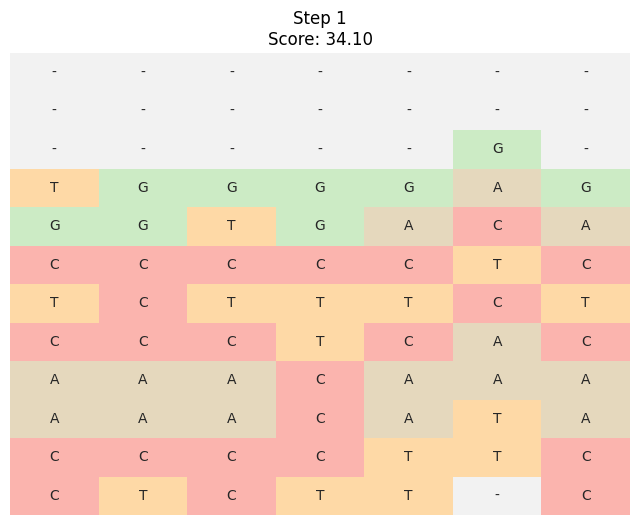

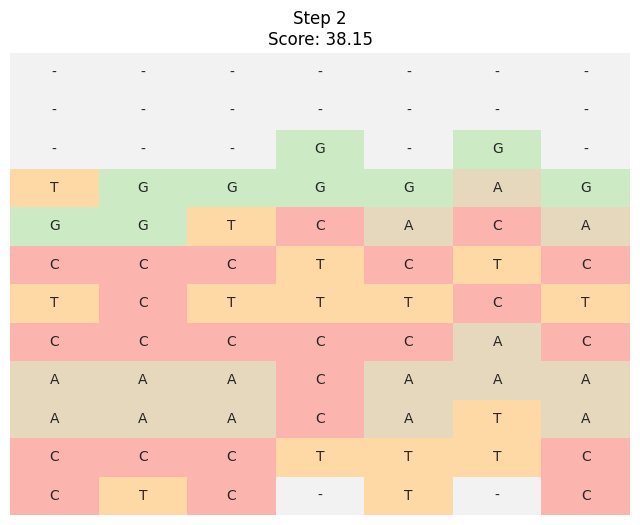

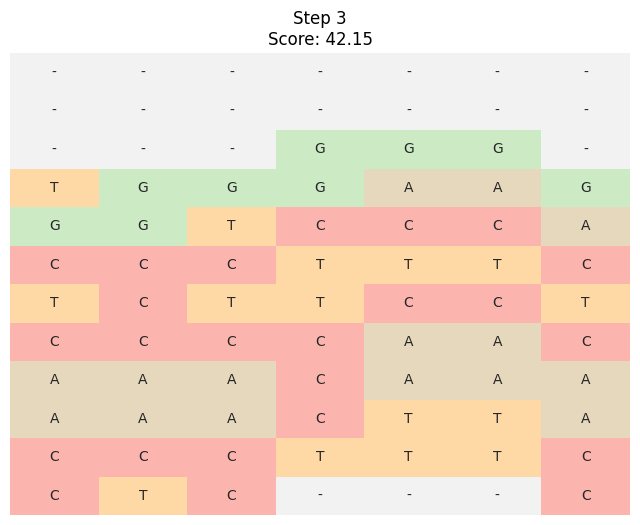

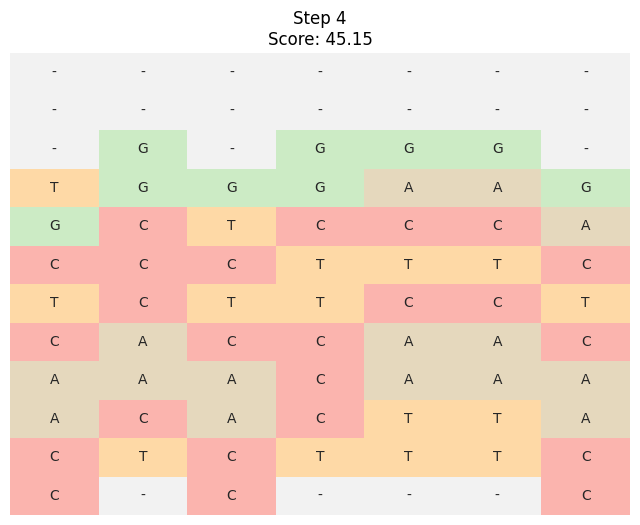

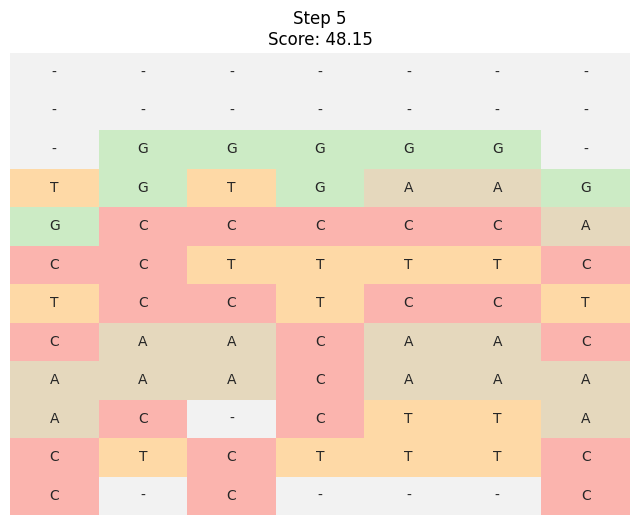

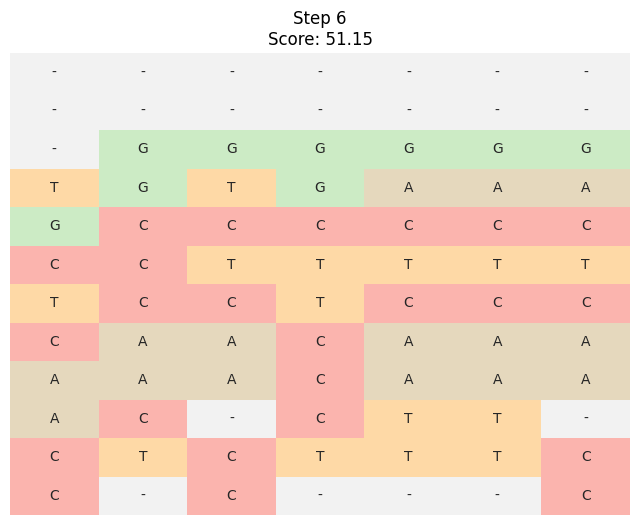

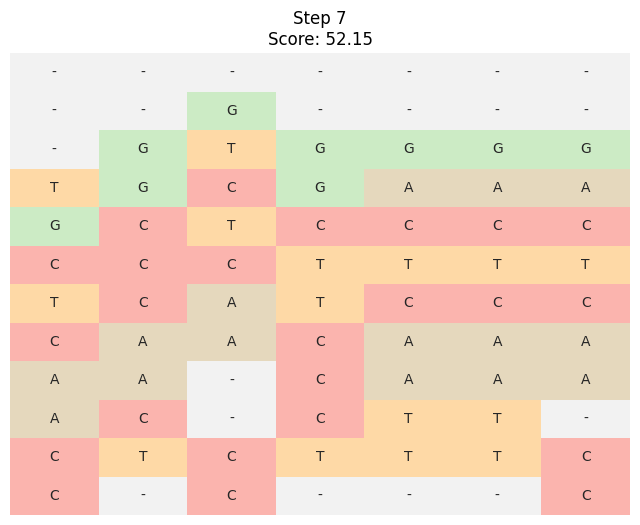

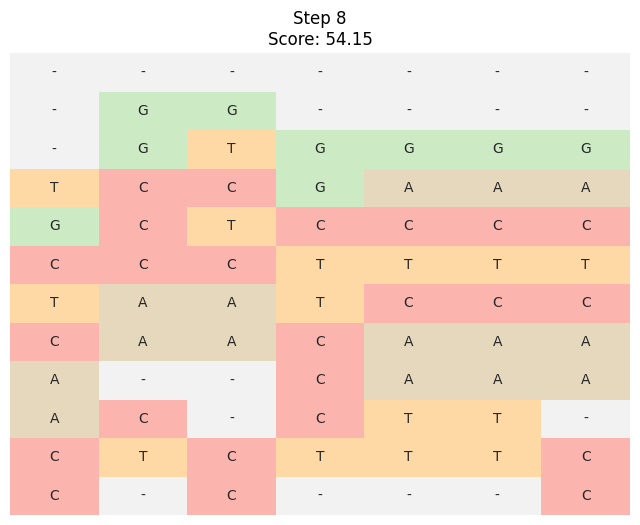

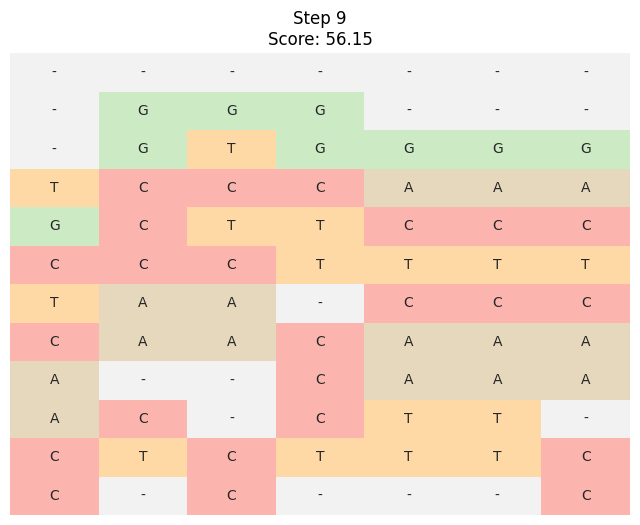

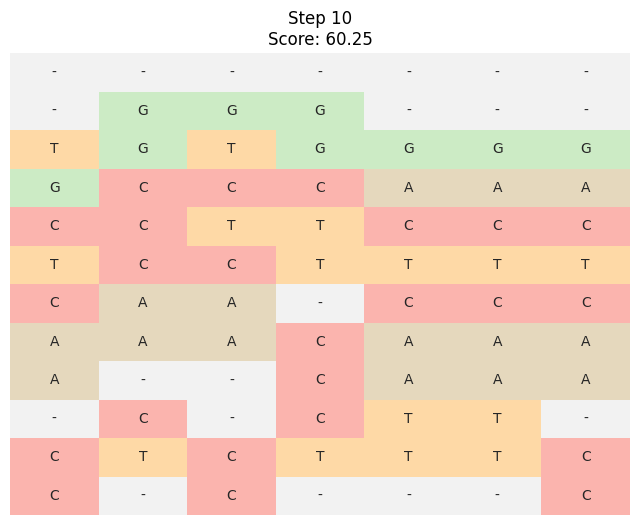

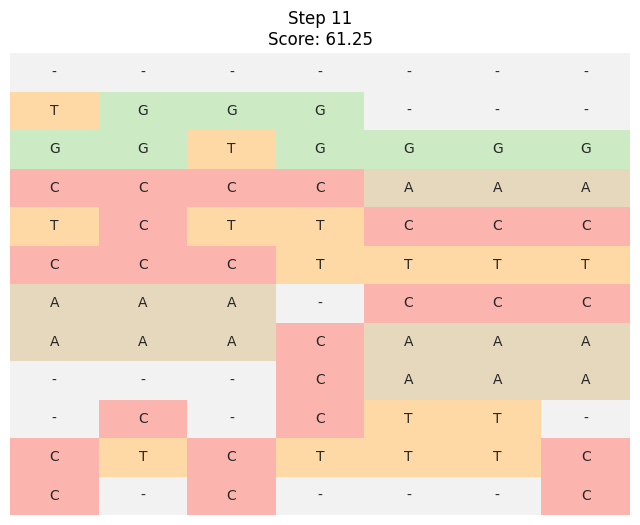

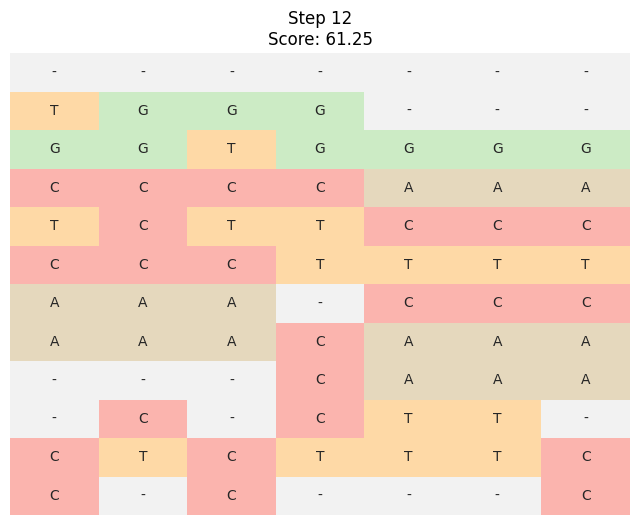

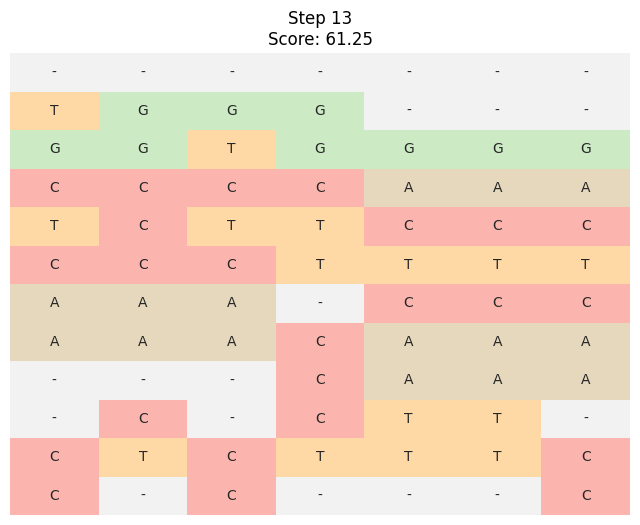


Final alignment score after replay: 61.25


In [ ]:
# =============================================================================
# Prepare Environment and Train the Actor-Critic Agent
# =============================================================================
starting_puzzle =
accepted_pair = starting_puzzle.accepted_pair


env_ac = RLMSAPuzzleEnv_AC(starting_puzzle, accepted_pair, max_moves)
state_shape = env_ac.get_state().shape  # (n_rows, row_length)
n_rows, row_length = state_shape
num_actions = n_rows * row_length

# Initialize Actor-Critic network and optimizer
model = ActorCritic(n_rows, row_length, num_actions)
optimizer = optim.Adam(model.parameters(), lr=5e-5)

model = ActorCritic(n_rows, row_length, num_actions)
model.load_state_dict(torch.load("actor_critic_model.pth"))

evaluate_actor_critic(env_ac, model, puzzle)

In [ ]:


# =============================================================================
# Prepare Environment and Train the Actor-Critic Agent
# =============================================================================
test_df = pd.read_pickle('/content/data_hackaton_test.data')

starting_puzzle =
accepted_pair = starting_puzzle.accepted_pair


env_ac = RLMSAPuzzleEnv_AC(starting_puzzle, accepted_pair, max_moves)
state_shape = env_ac.get_state().shape  # (n_rows, row_length)
n_rows, row_length = state_shape
num_actions = n_rows * row_length

# Initialize Actor-Critic network and optimizer
model = ActorCritic(n_rows, row_length, num_actions)
optimizer = optim.Adam(model.parameters(), lr=5e-5)

model = ActorCritic(n_rows, row_length, num_actions)
model.load_state_dict(torch.load("actor_critic_model.pth"))

evaluate_actor_critic(env_ac, model, puzzle)